# Exploratory Data Analysis on Pizza Sales

### 1. Introduction
Pizza sales data were analyzed to gain insights into customer preferences, popular pizza categories, sizes, and sales trends. The dataset was explored to identify patterns and correlations, providing valuable information for strategic decision-making.

### 2. Data Collection
Data Source: The dataset was obtained from the Kaggle. Here is the link [https://www.kaggle.com/datasets/shilongzhuang/pizza-sales]

Data Description: The dataset contains information about pizza orders, including order date, time, pizza category, size, quantity, unit price, and total price.

Column names: order_id,
order_details_id, 
pizza_id, 
quantity,
order_date, 
order_time,
unit_price,
total_price,
pizza_size,
pzza_type,
pizza_ingredients,
pizza_name.

Data Cleaning: The data was cleaned to handle missing values, duplicates, and outliers. Create columns for year, month, day, and hour were derived from the 'order_date' and 'order_time' columns.

### 3. Exploratory Data Analysis

##### 3.1 Summary Statistics
Total Orders: There were a total of 21350 unique orders placed.

Total Revenue: The total revenue generated from pizza sales was 817860.05€.

##### 3.2 Popular Pizza Categories and Sizes
Top Categories: The analysis identified Classic as the most popular pizza categories based on the number of orders. Customers frequently ordered pizzas from these categories.

Preferred Sizes: Customers showed a strong preference for L pizza size, indicating a trend toward specific portion choices.

##### 3.3 Best and Worst Selling Pizzas
Best Sellers: The top three best-selling pizzas were The Classic Deluxe Pizza, The Barbecue Chicken Pizza, The Hawaiian Pizza. These pizzas attracted the highest number of orders and contributed significantly to total sales.

Least Popular Pizzas: Conversely, the analysis highlighted The Brie Carre Pizza, The Mediterranean Pizza, The Calabrese Pizza as the least popular options, indicating potential areas for improvement or marketing focus.

##### 3.4 Sales Trends and Patterns
Busiest Month: July emerged as the peak period for pizza sales. Understanding the factors contributing to this spike could aid in targeted marketing efforts during similar periods.

Busiest Day: There was a noticeable spike in sales on the weekends. The data revealed that Friday was consistently the busiest day of the week for pizza orders. This information is valuable for staffing and inventory management. Curiously, it appeared that the trend had started on Thursday.

Busiest Time: Sales peaked at 12 o'clock, suggesting a common mealtime preference among customers. The majority of orders were placed in between 12 to 13 p.m.Additionally, significant orders also recieved in the evening from 17 to 19 o'clock.


##### 3.5. Price Analysis and Customer Behavior
Price Sensitivity: A scatter plot analysis demonstrated that while there was a range of unit prices, customers were generally sensitive to price, with most purchases occurring within a specific price range.

Category-specific Behavior: Average price by category analysis revealed varying price points across pizza categories, indicating differences in customer expectations and willingness to pay based on the type of pizza.



#### Import libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

#### Data preprosessing

In [3]:
# load the dataset into a dataframe

df = pd.read_excel(r'Data Model - Pizza Sales.xlsx')

In [4]:
#check first 5 data if the dataframe
df.head()

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,2015-01-01,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [5]:
#check the column's name
df.columns

Index(['order_details_id', 'order_id', 'pizza_id', 'quantity', 'order_date',
       'order_time', 'unit_price', 'total_price', 'pizza_size',
       'pizza_category', 'pizza_ingredients', 'pizza_name'],
      dtype='object')

In [6]:
# check the deimension
df.shape

(48620, 12)

In [7]:
# check detail of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   order_details_id   48620 non-null  int64         
 1   order_id           48620 non-null  int64         
 2   pizza_id           48620 non-null  object        
 3   quantity           48620 non-null  int64         
 4   order_date         48620 non-null  datetime64[ns]
 5   order_time         48620 non-null  object        
 6   unit_price         48620 non-null  float64       
 7   total_price        48620 non-null  float64       
 8   pizza_size         48620 non-null  object        
 9   pizza_category     48620 non-null  object        
 10  pizza_ingredients  48620 non-null  object        
 11  pizza_name         48620 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(6)
memory usage: 4.5+ MB


In [8]:
# check duplicate values
df.duplicated().sum()

0

In [9]:
#check datatypes of each column
df.dtypes

order_details_id              int64
order_id                      int64
pizza_id                     object
quantity                      int64
order_date           datetime64[ns]
order_time                   object
unit_price                  float64
total_price                 float64
pizza_size                   object
pizza_category               object
pizza_ingredients            object
pizza_name                   object
dtype: object

In [10]:
# check missing values
df.isnull().sum()

order_details_id     0
order_id             0
pizza_id             0
quantity             0
order_date           0
order_time           0
unit_price           0
total_price          0
pizza_size           0
pizza_category       0
pizza_ingredients    0
pizza_name           0
dtype: int64

In [11]:
# create new columns for year,month,weekday,hour
# year column
df['year']= df['order_date'].dt.year
# month column
df['month']= df['order_date'].dt.month_name()
# day column
df['day']= df['order_date'].dt.day_name()
# hour column
df['order_hour'] = df['order_time'].apply(lambda x: x.hour)

In [12]:
df['year'].value_counts()

2015    48620
Name: year, dtype: int64

In [13]:
df.head()

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,year,month,day,order_hour
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,2015,January,Thursday,11
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,2015,January,Thursday,11
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza,2015,January,Thursday,11
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza,2015,January,Thursday,11
4,5,2,mexicana_m,1,2015-01-01,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza,2015,January,Thursday,11


#### Exploratory Data Analysis





In [14]:
#total order
total_orders = df['order_id'].nunique()
total_orders

21350

In [15]:
# Total revenue
total_revenue = df['total_price'].sum()
total_revenue

817860.05

In [16]:
# popular pizzas category according by order
popular_category_order= df.groupby('pizza_category')['order_id'].count().sort_values(ascending=False)
popular_category_order

pizza_category
Classic    14579
Supreme    11777
Veggie     11449
Chicken    10815
Name: order_id, dtype: int64

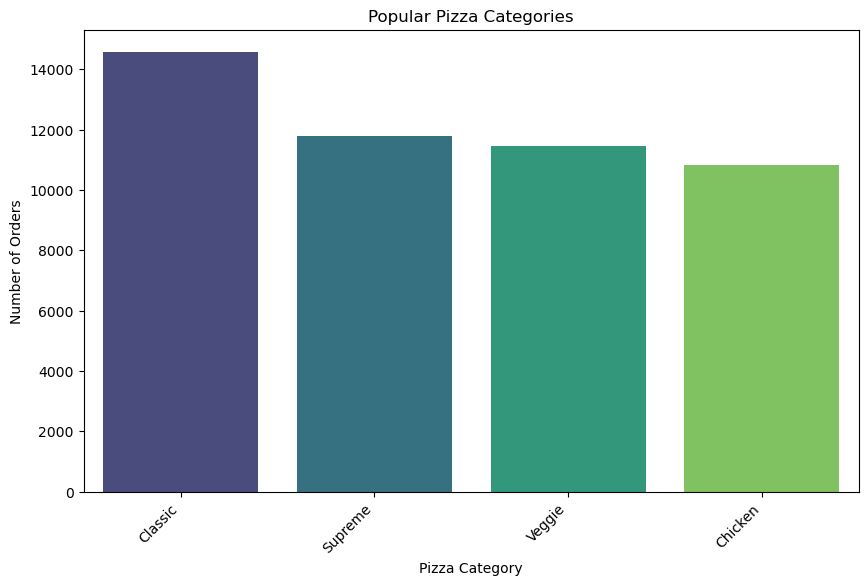

In [17]:
plt.figure(figsize=(10, 6))
sns.barplot(x=popular_category_order.index, y=popular_category_order.values, palette="viridis")
plt.xlabel('Pizza Category')
plt.ylabel('Number of Orders')
plt.title('Popular Pizza Categories')
plt.xticks(rotation=45, ha='right')
plt.show()


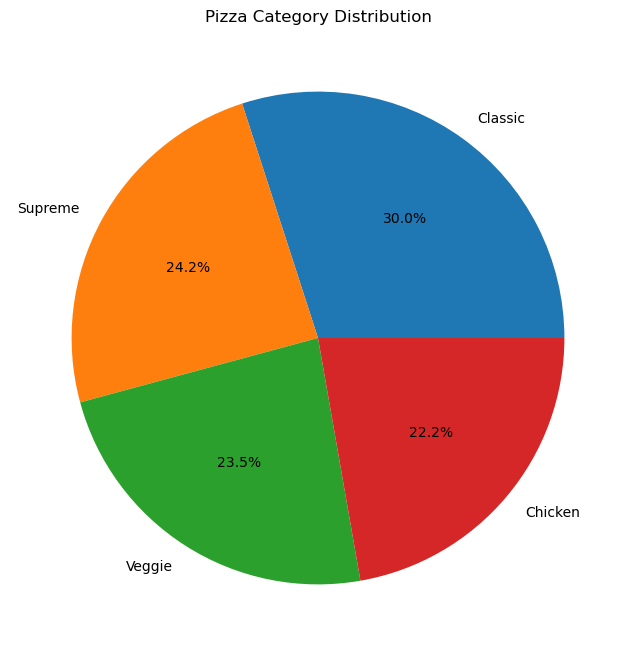

In [18]:
# Pizza Category Distribution

plt.figure(figsize=(8, 8))
plt.pie(popular_category_order, labels=popular_category_order.index, autopct='%1.1f%%')
plt.title('Pizza Category Distribution')
plt.show()

In [19]:
# popular pizzas category according by quantity
popular_category_quantity= df.groupby('pizza_category')['quantity'].sum().sort_values(ascending=False)
popular_category_quantity

pizza_category
Classic    14888
Supreme    11987
Veggie     11649
Chicken    11050
Name: quantity, dtype: int64

In [20]:
# popular pizzas size according by order
popular_size_order= df.groupby('pizza_size')['order_id'].count().sort_values(ascending=False)
popular_size_order

pizza_size
L      18526
M      15385
S      14137
XL       544
XXL       28
Name: order_id, dtype: int64

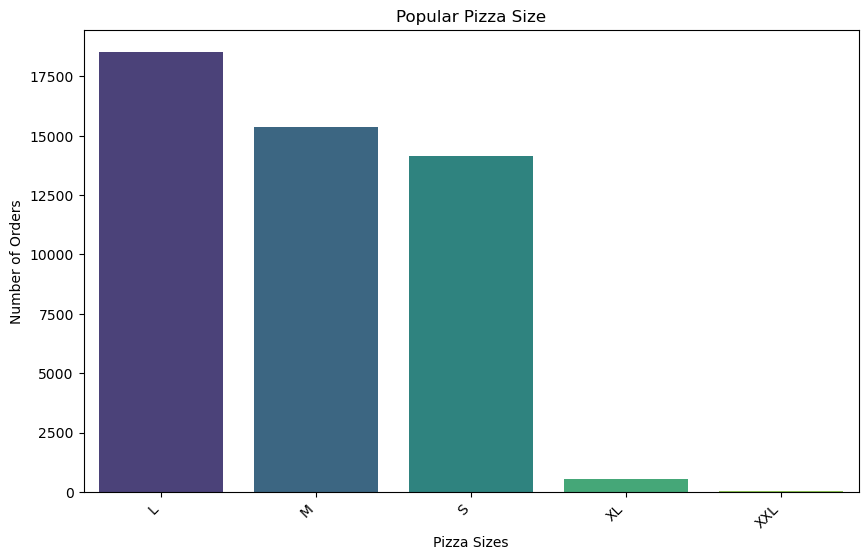

In [21]:
plt.figure(figsize=(10, 6))
sns.barplot(x=popular_size_order.index, y=popular_size_order.values, palette="viridis")
plt.xlabel('Pizza Sizes')
plt.ylabel('Number of Orders')
plt.title('Popular Pizza Size')
plt.xticks(rotation=45, ha='right')
plt.show()

In [22]:
# popular pizzas category according by quantity
popular_size_quantity= df.groupby('pizza_size')['quantity'].sum().sort_values(ascending=False)
popular_size_quantity

pizza_size
L      18956
M      15635
S      14403
XL       552
XXL       28
Name: quantity, dtype: int64

In [23]:
#busies months by orders
busiest_month_orders = df.groupby('month')['order_id'].count().sort_values(ascending=False)
busiest_month_orders

month
July         4301
May          4239
March        4186
November     4185
January      4156
August       4094
April        4067
June         4025
February     3892
December     3859
September    3819
October      3797
Name: order_id, dtype: int64

In [24]:
#busies months by quantity
monthly_sales_quantity = df.groupby('month')['quantity'].sum().sort_values(ascending=False)
monthly_sales_quantity

month
July         4392
May          4328
November     4266
March        4261
January      4232
August       4168
April        4151
June         4107
February     3961
December     3935
September    3890
October      3883
Name: quantity, dtype: int64

In [25]:
# most busiest month of the year
busiest_month = df.groupby('month').size().idxmax()
busiest_month

'July'

In [26]:
#busiest days of the week
busiest_day = df.groupby('day')['order_id'].count().sort_values(ascending=False)
busiest_day

day
Friday       8106
Saturday     7355
Thursday     7323
Wednesday    6797
Tuesday      6753
Monday       6369
Sunday       5917
Name: order_id, dtype: int64

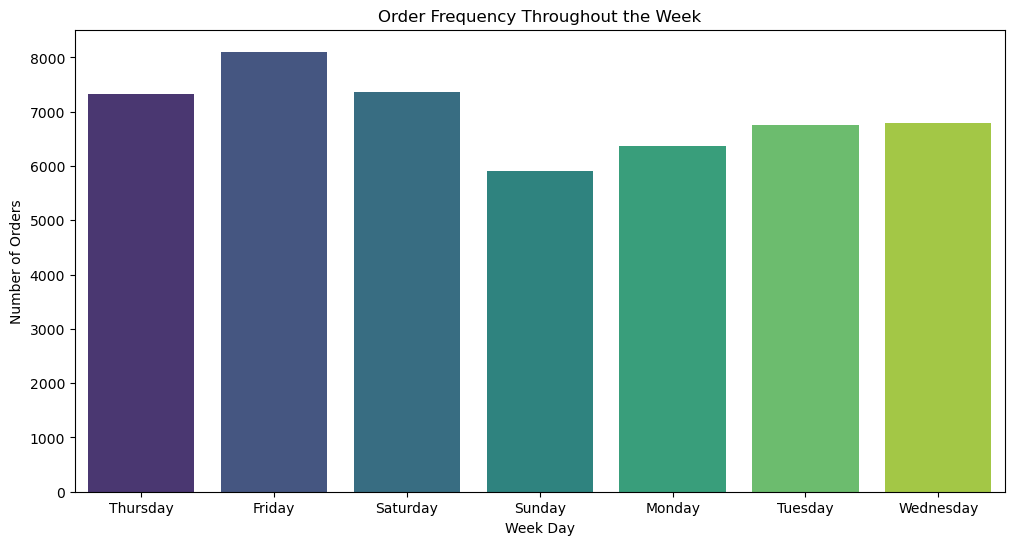

In [27]:
# Order day Analysis
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='day', palette='viridis')
plt.xlabel('Week Day')
plt.ylabel('Number of Orders')
plt.title('Order Frequency Throughout the Week')
plt.show()

On the weekends, there was a noticeable spike in sales, and curiously, it appeared that the trend had started on Thursday.

In [28]:
# most busiest day of the week
busiest_day = df.groupby('day').size().idxmax()
busiest_day

'Friday'

In [29]:
# busiest times of the day
busiest_time = df.groupby('order_hour')['order_id'].count().sort_values(ascending=False)
busiest_time

order_hour
12    6543
13    6203
18    5359
17    5143
19    4350
16    4185
14    3521
20    3487
15    3170
11    2672
21    2528
22    1370
23      68
10      17
9        4
Name: order_id, dtype: int64

In [30]:
# most busiest period of the day
busiest_time = df.groupby('order_hour').size().idxmax()
busiest_time

12

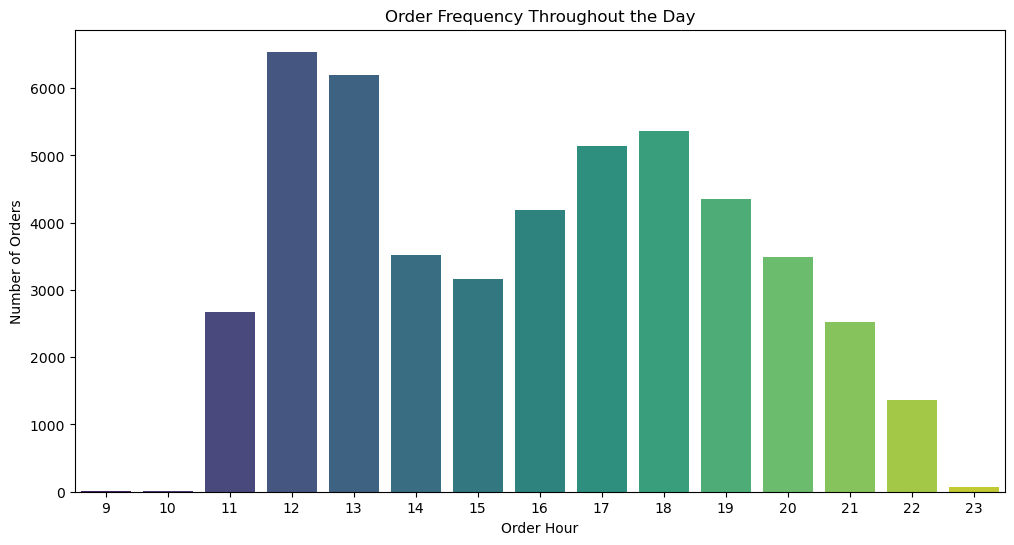

In [31]:
# Order Time Analysis
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='order_hour', palette='viridis')
plt.xlabel('Order Hour')
plt.ylabel('Number of Orders')
plt.title('Order Frequency Throughout the Day')
plt.show()

The majority of orders were placed in between 12 to 13 p.m.Additionally, significant orders also recieved in the evening from 17 to 19 o'clock.


In [32]:
# Price Analysis of the pizza categories
avg_price_by_category = df.groupby('pizza_category')['unit_price'].mean()
avg_price_by_category

pizza_category
Chicken    17.709408
Classic    14.797490
Supreme    17.363229
Veggie     16.612639
Name: unit_price, dtype: float64

In [33]:
# Price Analysis of the pizza sizes
avg_price_by_size = df.groupby('pizza_size')['unit_price'].mean()
avg_price_by_size

pizza_size
L      19.802553
M      15.951219
S      12.364328
XL     25.500000
XXL    35.950000
Name: unit_price, dtype: float64

<Figure size 1000x600 with 0 Axes>

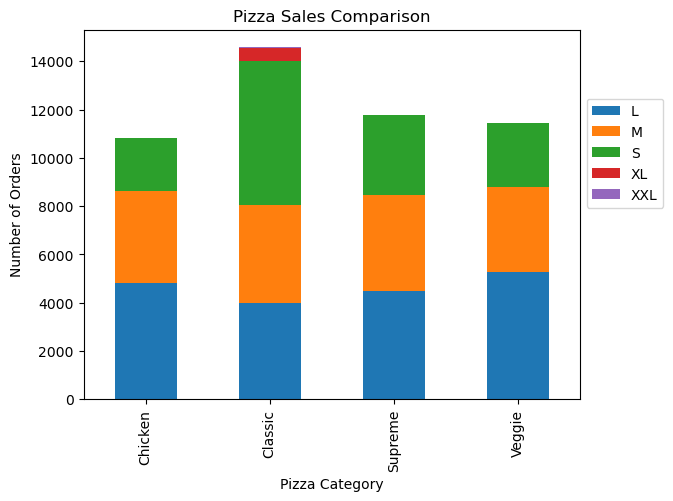

In [34]:
# Pizza Sales Comparison
plt.figure(figsize=(10, 6))
df.groupby(['pizza_category', 'pizza_size']).size().unstack().plot(kind='bar', stacked=True)
plt.xlabel('Pizza Category')
plt.ylabel('Number of Orders')
plt.title('Pizza Sales Comparison')
plt.legend(title='Pizza Size')
plt.legend(loc='lower left', bbox_to_anchor=(1, 0.5))
plt.show()

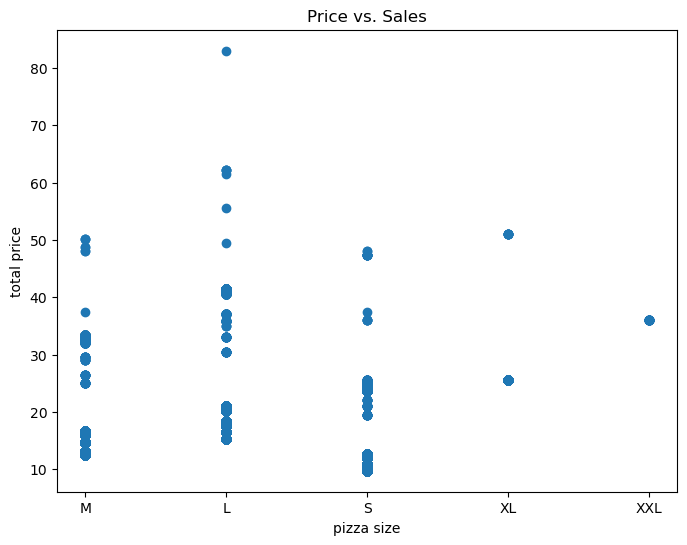

In [35]:
# Price vs. Sales
plt.figure(figsize=(8, 6))
plt.scatter(df['pizza_size'], df['total_price'])
plt.xlabel('pizza size')
plt.ylabel('total price')
plt.title('Price vs. Sales')
plt.show()

In [36]:
# Popular Pizzas
Best_Selling_Pizzas= df.groupby('pizza_name')['quantity'].sum().nlargest(3)
Best_Selling_Pizzas

pizza_name
The Classic Deluxe Pizza      2453
The Barbecue Chicken Pizza    2432
The Hawaiian Pizza            2422
Name: quantity, dtype: int64

In [37]:
# Popular Pizzas
worst_selling_pizzas = df.groupby('pizza_name')['quantity'].sum().sort_values(ascending=True).head(3)
worst_selling_pizzas

pizza_name
The Brie Carre Pizza       490
The Mediterranean Pizza    934
The Calabrese Pizza        937
Name: quantity, dtype: int64

In [38]:
# Seasonal Sales Patterns
monthly_sales = df.groupby('month')['total_price'].sum()
monthly_sales

month
April        68736.80
August       68278.25
December     64701.15
February     65159.60
January      69793.30
July         72557.90
June         68230.20
March        70397.10
May          71402.75
November     70395.35
October      64027.60
September    64180.05
Name: total_price, dtype: float64

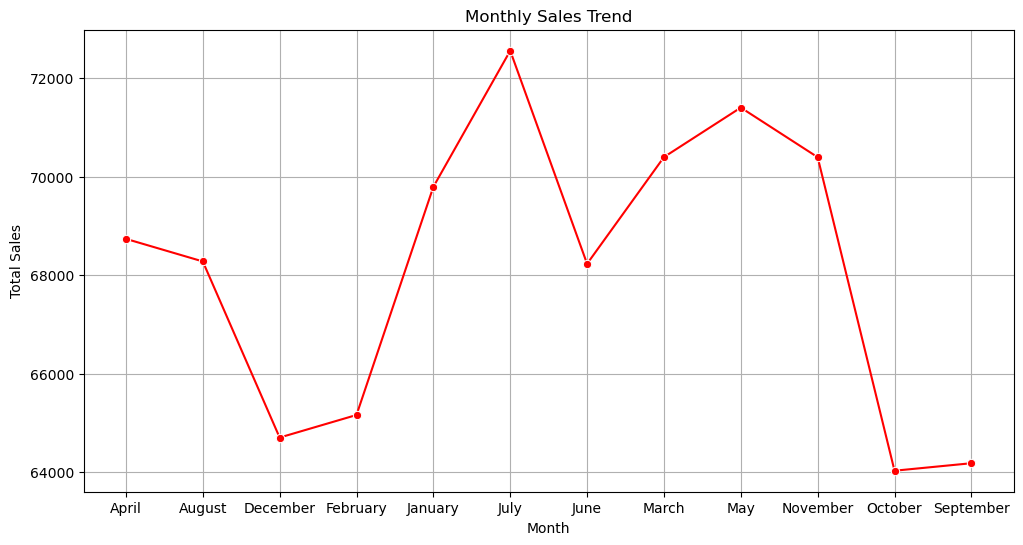

In [39]:
# Monthly sales trend visualization using Seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, marker='o', color='r')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Monthly Sales Trend')
plt.grid(True)
plt.show()
